In [140]:
import pandas as pd 
import numpy as np 

In [141]:
df = pd.read_csv("cleaned_data.csv")

In [142]:
df.head()

,Unnamed: 0,year,genre,popularity
0,0,2000,acoustic,37
1,1,2000,opera,0
2,2,2000,opera,0
3,3,2000,opera,0
4,4,2000,opera,0


In [143]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,year,genre,popularity
0,2000,acoustic,37
1,2000,opera,0
2,2000,opera,0
3,2000,opera,0
4,2000,opera,0


In [144]:
df.tail()

,year,genre,popularity
1159743,2023,hard-rock,21
1159744,2023,hard-rock,20
1159745,2023,hard-rock,20
1159746,2023,hard-rock,32
1159747,2023,indian,0


In [145]:
# Replace them with the actual column names
df_2023 = df[df['year'] == 2023].copy()

# Find the most popular genre in 2023
most_popular_genre_2023 = df_2023.loc[df_2023['popularity'].idxmax(), 'genre']
most_popular_genre_2023


'pop'

In [146]:
from sklearn.preprocessing import LabelEncoder

In [147]:
top_genres = df.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(15)
top_genres

genre
pop          55.685806
hip-hop      46.315736
rock         46.228985
dance        43.034337
metal        39.698860
alt-rock     38.596807
sad          36.122248
indie-pop    35.518260
folk         33.448547
country      33.047419
electro      31.450289
punk         31.367274
jazz         30.433733
soul         30.387118
k-pop        27.736203
Name: popularity, dtype: float64

In [148]:

max_top_genres = df.groupby('genre')['popularity'].max().sort_values(ascending=False).head(15)

max_top_genres

genre
pop          100
hip-hop       96
dance         93
k-pop         92
piano         91
garage        91
sad           91
folk          89
indie-pop     89
sertanejo     88
country       88
sleep         87
electro       86
rock          86
emo           85
Name: popularity, dtype: int64

In [149]:
# Filter the dataset for the top genres
df_top_genres = df[df['genre'].isin(top_genres.index)].copy()
df_top_genres.head()

,year,genre,popularity
918,2000,pop,70
919,2000,pop,65
920,2000,pop,68
1374,2000,pop,69
2751,2000,pop,62


In [150]:
df_top_genres['genre'].unique()

array(['pop', 'punk', 'hip-hop', 'k-pop', 'jazz', 'metal', 'indie-pop',
       'soul', 'sad', 'rock', 'folk', 'electro', 'country', 'dance',
       'alt-rock'], dtype=object)

In [151]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

column_to_encode = 'genre'
df_top_genres[column_to_encode + '_encoded'] = label_encoder.fit_transform(df_top_genres[column_to_encode])
df_top_genres.head()

,year,genre,popularity,genre_encoded
918,2000,pop,70,10
919,2000,pop,65,10
920,2000,pop,68,10
1374,2000,pop,69,10
2751,2000,pop,62,10


In [152]:
# Access the encoding representations
encoding_representations = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
encoding_representations

{'alt-rock': 0,
 'country': 1,
 'dance': 2,
 'electro': 3,
 'folk': 4,
 'hip-hop': 5,
 'indie-pop': 6,
 'jazz': 7,
 'k-pop': 8,
 'metal': 9,
 'pop': 10,
 'punk': 11,
 'rock': 12,
 'sad': 13,
 'soul': 14}

In [153]:
target_column = 'popularity'
feature_columns = ['year', 'genre_encoded']  

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [155]:
from sklearn.metrics import mean_squared_error, r2_score

In [156]:
# Select features (independent variables) and target (dependent variable)
X = df_top_genres[feature_columns]
y = df_top_genres[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [157]:
mse 

172.2074992454975

In [158]:
rmse = np.sqrt(mse)

In [159]:
rmse

13.122785498723108

In [160]:
r2 

0.23437242204464026

In [161]:
model.coef_

array([ 1.0468463 , -0.41325131])

In [162]:
model.intercept_

-2067.775719380139

In [163]:
X_test.head()

,year,genre_encoded
625618,2013,0
131101,2003,8
884419,2018,0
172738,2004,7
150433,2003,1


In [164]:
df_top_genres['year'].max()

2023

In [165]:
test_2024 = []
for each_genre in range(len(top_genres)):
    a = [2024, each_genre]
    test_2024.append(a)
    

In [166]:
test_2024

[[2024, 0],
 [2024, 1],
 [2024, 2],
 [2024, 3],
 [2024, 4],
 [2024, 5],
 [2024, 6],
 [2024, 7],
 [2024, 8],
 [2024, 9],
 [2024, 10],
 [2024, 11],
 [2024, 12],
 [2024, 13],
 [2024, 14]]

In [167]:
test_2024 = pd.DataFrame(test_2024, columns=['year', 'genre_encoded'])
test_2024

,year,genre_encoded
0,2024,0
1,2024,1
2,2024,2
3,2024,3
4,2024,4
5,2024,5
6,2024,6
7,2024,7
8,2024,8
9,2024,9


In [168]:
output = model.predict(test_2024)

In [169]:
predict_output_2024 = []
idx = 0
for value in encoding_representations:
    a = [value, output[idx]]
    idx += 1
    predict_output_2024.append(a)

In [170]:
predict_output_2024

[['alt-rock', 51.041181836991655],
 ['country', 50.62793052644247],
 ['dance', 50.21467921589283],
 ['electro', 49.801427905343644],
 ['folk', 49.38817659479446],
 ['hip-hop', 48.97492528424482],
 ['indie-pop', 48.56167397369563],
 ['jazz', 48.14842266314645],
 ['k-pop', 47.73517135259681],
 ['metal', 47.32192004204762],
 ['pop', 46.90866873149844],
 ['punk', 46.4954174209488],
 ['rock', 46.08216611039961],
 ['sad', 45.66891479985043],
 ['soul', 45.25566348930079]]

In [171]:
predicted_output = pd.DataFrame(predict_output_2024, columns=['genre','popularity'])
predicted_output

,genre,popularity
0,alt-rock,51.041182
1,country,50.627931
2,dance,50.214679
3,electro,49.801428
4,folk,49.388177
5,hip-hop,48.974925
6,indie-pop,48.561674
7,jazz,48.148423
8,k-pop,47.735171
9,metal,47.321920


In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Popularity of Genres')

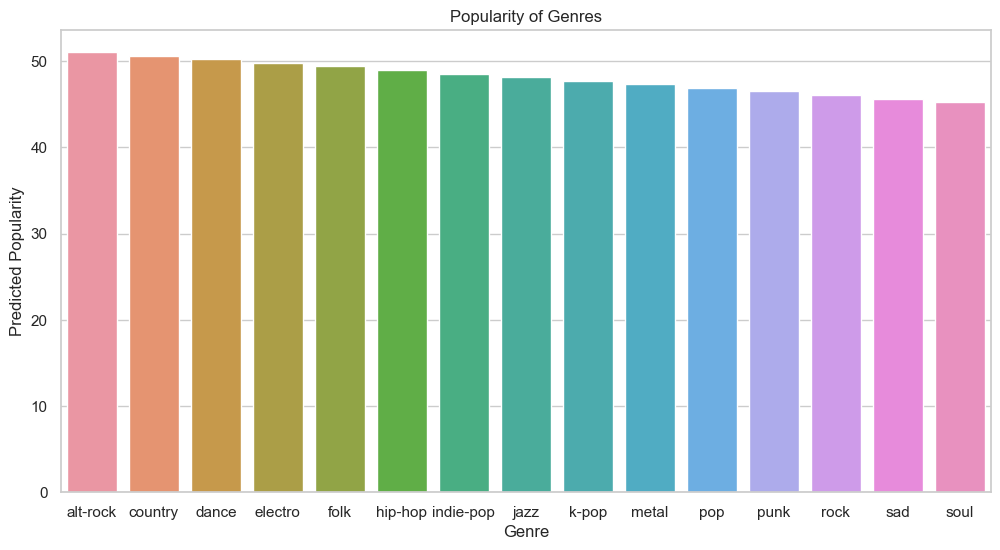

In [173]:
# Replace them with the actual column names
sns.set(style="whitegrid")  # Set the style of the plot

plt.figure(figsize=(12, 6))  # Set the size of the plot

# Create a bar plot using Seaborn
sns.barplot(x='genre', y='popularity', data=predicted_output)

# Set labels and title
plt.xlabel('Genre')
plt.ylabel('Predicted Popularity')
plt.title('Popularity of Genres')


In [174]:
# Filter the dataset for the top genres
df_top_genres = df[df['genre'].isin(top_genres.index)].copy()

# Create a LabelEncoder object
label_encoder = LabelEncoder()

column_to_encode = 'genre'
df_top_genres[column_to_encode + '_encoded'] = label_encoder.fit_transform(df_top_genres[column_to_encode])

# Access the encoding representations
encoding_representations = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
encoding_representations

{'alt-rock': 0,
 'country': 1,
 'dance': 2,
 'electro': 3,
 'folk': 4,
 'hip-hop': 5,
 'indie-pop': 6,
 'jazz': 7,
 'k-pop': 8,
 'metal': 9,
 'pop': 10,
 'punk': 11,
 'rock': 12,
 'sad': 13,
 'soul': 14}

In [175]:
target_column = 'popularity'
feature_columns = ['year', 'genre_encoded']  

# Select features (independent variables) and target (dependent variable)
X = df_top_genres[feature_columns]
y = df_top_genres[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(172.2074992454975, 0.23437242204464026)

In [176]:
# calculate_rmse(y_test,y_pred)

In [177]:
output = model.predict(test_2024)

predict_output_2024 = []
idx = 0
for value in encoding_representations:
    a = [value, output[idx]]
    idx += 1
    predict_output_2024.append(a)

predicted_output = pd.DataFrame(predict_output_2024, columns=['genre','popularity'])
predicted_output

,genre,popularity
0,alt-rock,51.041182
1,country,50.627931
2,dance,50.214679
3,electro,49.801428
4,folk,49.388177
5,hip-hop,48.974925
6,indie-pop,48.561674
7,jazz,48.148423
8,k-pop,47.735171
9,metal,47.321920


Text(0.5, 1.0, 'Popularity of Genres')

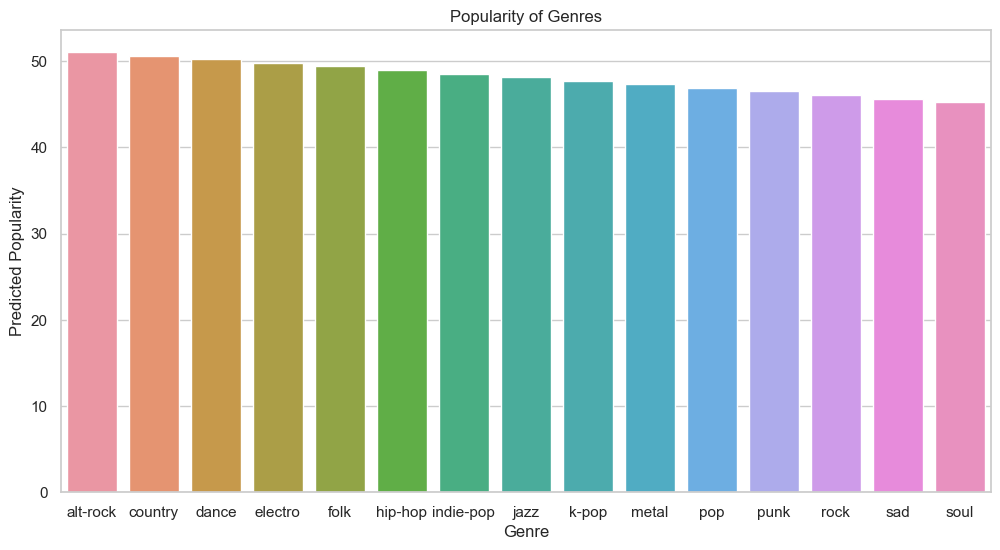

In [178]:
# Replace them with the actual column names
sns.set(style="whitegrid")  # Set the style of the plot

plt.figure(figsize=(12, 6))  # Set the size of the plot

# Create a bar plot using Seaborn
sns.barplot(x='genre', y='popularity', data=predicted_output)

# Set labels and title
plt.xlabel('Genre')
plt.ylabel('Predicted Popularity')
plt.title('Popularity of Genres')


### -------------------------------------------------------

# XGboost

In [179]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [180]:
top_genres = df.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(15)
top_genres

genre
pop          55.685806
hip-hop      46.315736
rock         46.228985
dance        43.034337
metal        39.698860
alt-rock     38.596807
sad          36.122248
indie-pop    35.518260
folk         33.448547
country      33.047419
electro      31.450289
punk         31.367274
jazz         30.433733
soul         30.387118
k-pop        27.736203
Name: popularity, dtype: float64

In [181]:
# Filter the dataset for the top genres
df_top_genres = df[df['genre'].isin(top_genres.index)].copy()
df_top_genres.head()

,year,genre,popularity
918,2000,pop,70
919,2000,pop,65
920,2000,pop,68
1374,2000,pop,69
2751,2000,pop,62


In [182]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

column_to_encode = 'genre'
df_top_genres[column_to_encode + '_encoded'] = label_encoder.fit_transform(df_top_genres[column_to_encode])
df_top_genres.head()

,year,genre,popularity,genre_encoded
918,2000,pop,70,10
919,2000,pop,65,10
920,2000,pop,68,10
1374,2000,pop,69,10
2751,2000,pop,62,10


In [183]:
# Access the encoding representations
encoding_representations = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
encoding_representations

{'alt-rock': 0,
 'country': 1,
 'dance': 2,
 'electro': 3,
 'folk': 4,
 'hip-hop': 5,
 'indie-pop': 6,
 'jazz': 7,
 'k-pop': 8,
 'metal': 9,
 'pop': 10,
 'punk': 11,
 'rock': 12,
 'sad': 13,
 'soul': 14}

In [184]:
target_column = 'popularity'
feature_columns = ['year', 'genre_encoded']  

In [185]:
X = df_top_genres[feature_columns]
y = df_top_genres[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
# Create XGBoost regressor model
xgb_model = XGBRegressor(learning_rate=0.01, max_depth = 3)

# Fit the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [242]:
tot_mse = []
tot_rmse = []

def model_training_evaluation(lr, mxdpth):
    global tot_mse
    global tot_rmse
    
    # Create XGBoost regressor model
    xgb_model = XGBRegressor(learning_rate=lr, max_depth = mxdpth)

    # Fit the model
    xgb_model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = xgb_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    tot_mse.append([lr, mxdpth, mse])
    tot_rmse.append([lr, mxdpth, rmse])

In [243]:
for dpth in range(3, 10):
    lr = 0.01
    while lr<=0.1:
        model_training_evaluation(lr, dpth)
        lr+=0.01
        print("lr:", lr, "dpth:", dpth)

lr: 0.02 dpth: 3
lr: 0.03 dpth: 3
lr: 0.04 dpth: 3
lr: 0.05 dpth: 3
lr: 0.060000000000000005 dpth: 3
lr: 0.07 dpth: 3
lr: 0.08 dpth: 3
lr: 0.09 dpth: 3
lr: 0.09999999999999999 dpth: 3
lr: 0.10999999999999999 dpth: 3
lr: 0.02 dpth: 4
lr: 0.03 dpth: 4
lr: 0.04 dpth: 4
lr: 0.05 dpth: 4
lr: 0.060000000000000005 dpth: 4
lr: 0.07 dpth: 4
lr: 0.08 dpth: 4
lr: 0.09 dpth: 4
lr: 0.09999999999999999 dpth: 4
lr: 0.10999999999999999 dpth: 4
lr: 0.02 dpth: 5
lr: 0.03 dpth: 5
lr: 0.04 dpth: 5
lr: 0.05 dpth: 5
lr: 0.060000000000000005 dpth: 5
lr: 0.07 dpth: 5
lr: 0.08 dpth: 5
lr: 0.09 dpth: 5
lr: 0.09999999999999999 dpth: 5
lr: 0.10999999999999999 dpth: 5
lr: 0.02 dpth: 6
lr: 0.03 dpth: 6
lr: 0.04 dpth: 6
lr: 0.05 dpth: 6
lr: 0.060000000000000005 dpth: 6
lr: 0.07 dpth: 6
lr: 0.08 dpth: 6
lr: 0.09 dpth: 6
lr: 0.09999999999999999 dpth: 6
lr: 0.10999999999999999 dpth: 6
lr: 0.02 dpth: 7
lr: 0.03 dpth: 7
lr: 0.04 dpth: 7
lr: 0.05 dpth: 7
lr: 0.060000000000000005 dpth: 7
lr: 0.07 dpth: 7
lr: 0.08 dpth: 7
l

In [244]:
tot_mse

[[0.01, 3, 161.82488652903606],
 [0.02, 3, 140.54372045801338],
 [0.03, 3, 128.00771063987915],
 [0.04, 3, 120.35860101421633],
 [0.05, 3, 116.06398346830606],
 [0.060000000000000005, 3, 113.69658129723426],
 [0.07, 3, 112.37277822530437],
 [0.08, 3, 111.40448334018392],
 [0.09, 3, 110.42624573189599],
 [0.09999999999999999, 3, 110.12448313961394],
 [0.01, 4, 150.02763825939437],
 [0.02, 4, 127.49371745379891],
 [0.03, 4, 118.12959482409795],
 [0.04, 4, 113.20634271487518],
 [0.05, 4, 110.34992759653113],
 [0.060000000000000005, 4, 108.73305430331565],
 [0.07, 4, 108.19019467018187],
 [0.08, 4, 107.65680772519057],
 [0.09, 4, 107.31528129060578],
 [0.09999999999999999, 4, 107.03687096962348],
 [0.01, 5, 141.44667863677904],
 [0.02, 5, 119.31101648760755],
 [0.03, 5, 111.66453793078968],
 [0.04, 5, 108.54293549003012],
 [0.05, 5, 107.12347169445334],
 [0.060000000000000005, 5, 106.54813743671252],
 [0.07, 5, 106.23092552920582],
 [0.08, 5, 106.08390453412107],
 [0.09, 5, 106.02278490062

In [245]:
df_tmse = pd.DataFrame(tot_mse, columns=['learning_rate', 'Depth','MSE'])
df_tmse

,learning_rate,Depth,MSE
0,0.01,3,161.824887
1,0.02,3,140.543720
2,0.03,3,128.007711
3,0.04,3,120.358601
4,0.05,3,116.063983
...,...,...,...
65,0.06,9,105.636337
66,0.07,9,105.618954
67,0.08,9,105.618424
68,0.09,9,105.614649


In [246]:
df_trmse = pd.DataFrame(tot_rmse, columns=['learning_rate', 'Depth','RMSE'])
df_trmse

,learning_rate,Depth,RMSE
0,0.01,3,12.721041
1,0.02,3,11.855114
2,0.03,3,11.314049
3,0.04,3,10.970807
4,0.05,3,10.773300
...,...,...,...
65,0.06,9,10.277954
66,0.07,9,10.277108
67,0.08,9,10.277082
68,0.09,9,10.276899


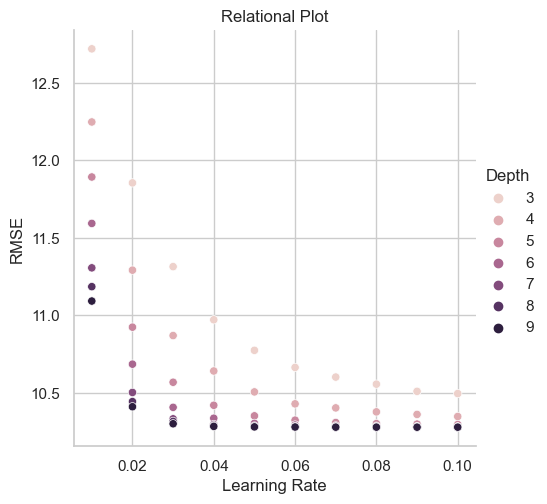

In [260]:
# Create a relational plot using relplot
sns.set(style="whitegrid")  # You can customize the style
rel_plot = sns.relplot(x="learning_rate", y="RMSE", hue="Depth", data=df_trmse)

# Customize the plot (optional)
rel_plot.set(title="Relational Plot", xlabel="Learning Rate", ylabel="RMSE")
plt.show()

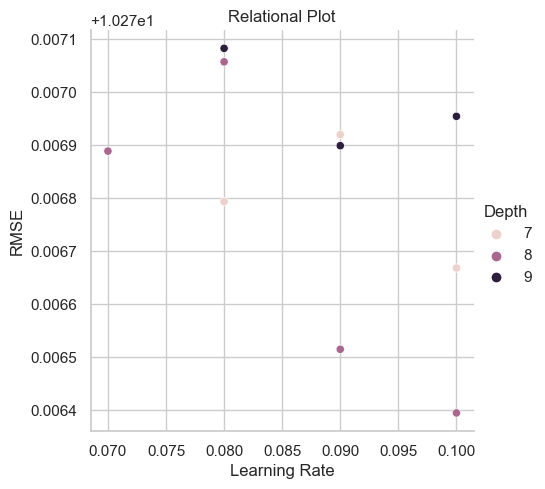

In [262]:
# Sort the DataFrame by the specified column in ascending order
sorted_df = df_trmse.sort_values(by='RMSE')

# Get the top rows with minimum values
top_min_values = sorted_df.head(10)

# Create a relational plot using relplot
sns.set(style="whitegrid")  # You can customize the style
rel_plot = sns.relplot(x="learning_rate", y="RMSE", hue="Depth", data=top_min_values)

# Customize the plot (optional)
rel_plot.set(title="Relational Plot", xlabel="Learning Rate", ylabel="RMSE")
plt.show()

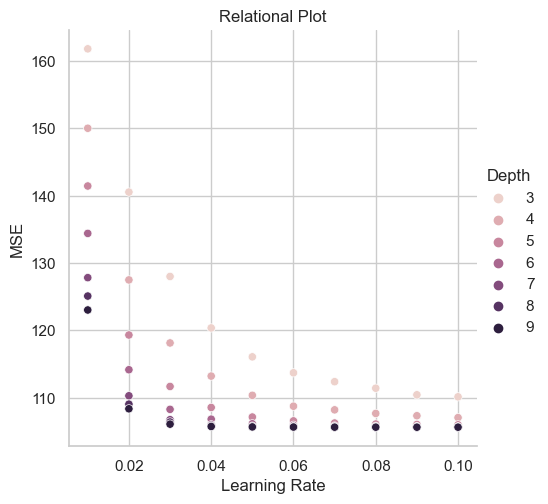

In [261]:
# Create a relational plot using relplot
sns.set(style="whitegrid")  # You can customize the style
rel_plot = sns.relplot(x="learning_rate", y="MSE", hue="Depth", data=df_tmse)

# Customize the plot (optional)
rel_plot.set(title="Relational Plot", xlabel="Learning Rate", ylabel="MSE")
plt.show()

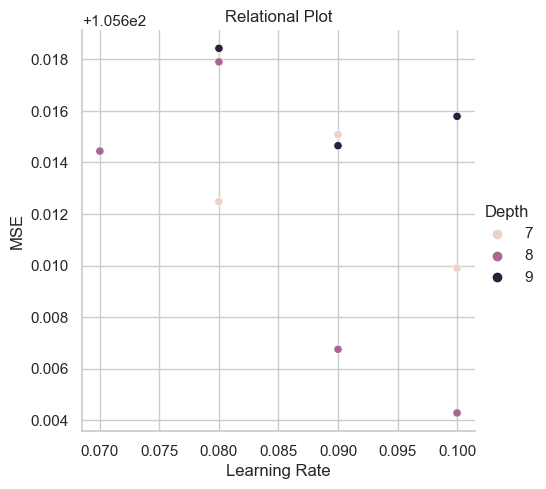

In [263]:
# Sort the DataFrame by the specified column in ascending order
sorted_df = df_tmse.sort_values(by='MSE')

# Get the top rows with minimum values
top_min_values = sorted_df.head(10)

# Create a relational plot using relplot
sns.set(style="whitegrid")  # You can customize the style
rel_plot = sns.relplot(x="learning_rate", y="MSE", hue="Depth", data=top_min_values)

# Customize the plot (optional)
rel_plot.set(title="Relational Plot", xlabel="Learning Rate", ylabel="MSE")
plt.show()

## Depth=8 and Learning Rate = 0.1

In [264]:
# Create XGBoost regressor model
xgb_model = XGBRegressor(learning_rate=0.1, max_depth = 8)

# Fit the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [265]:
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 8,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [266]:
xgb_model.learning_rate

0.1

In [267]:
# Predictions on the test set
y_pred = xgb_model.predict(X_test)

In [268]:
y_pred

array([37.82914  , 15.4742155, 43.570812 , ..., 42.78451  , 42.110416 ,
       42.946526 ], dtype=float32)

In [269]:
y_test

625618     45
131101     33
884419     33
172738     23
150433     20
           ..
406257     63
541847     60
1110651    40
938636     46
906459     41
Name: popularity, Length: 36619, dtype: int64

In [270]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)


In [271]:
df_top_genres['year'].max()


2023

In [272]:
test_2024 = []
for each_genre in range(len(top_genres)):
    a = [2024, each_genre]
    test_2024.append(a)
 

In [273]:
test_2024

[[2024, 0],
 [2024, 1],
 [2024, 2],
 [2024, 3],
 [2024, 4],
 [2024, 5],
 [2024, 6],
 [2024, 7],
 [2024, 8],
 [2024, 9],
 [2024, 10],
 [2024, 11],
 [2024, 12],
 [2024, 13],
 [2024, 14]]

In [274]:
test_2024 = pd.DataFrame(test_2024, columns=['year', 'genre_encoded'])
test_2024

,year,genre_encoded
0,2024,0
1,2024,1
2,2024,2
3,2024,3
4,2024,4
5,2024,5
6,2024,6
7,2024,7
8,2024,8
9,2024,9


In [275]:
output = xgb_model.predict(test_2024)

In [276]:
predict_output_2024 = []
idx = 0
for value in encoding_representations:
    a = [value, output[idx]]
    idx += 1
    predict_output_2024.append(a)

predict_output_2024

[['alt-rock', 30.664295],
 ['country', 46.54333],
 ['dance', 24.95884],
 ['electro', 38.161037],
 ['folk', 27.384512],
 ['hip-hop', 42.388493],
 ['indie-pop', 41.33935],
 ['jazz', 29.023968],
 ['k-pop', 33.078224],
 ['metal', 39.984177],
 ['pop', 41.330666],
 ['punk', 29.851933],
 ['rock', 19.74046],
 ['sad', 33.166424],
 ['soul', 28.972023]]

In [277]:
import plotly.express as px

# Assuming 'predict_output_2024' is your DataFrame with predicted genres and popularity
fig = px.bar(predict_output_2024, x=0, y=1, labels={'0': 'Genre', '1': 'Predicted Popularity'}, title='Predicted Popularity of Genres in 2024')

# Customize the layout if needed
fig.update_layout(
    xaxis_title='Genre',
    yaxis_title='Predicted Popularity',
    bargap=0.1  # Adjust the gap between bars
)

# Show the interactive plot
fig.show()


In [278]:
def calculate_rmse(actual_values, predicted_values):
    mse = np.mean((actual_values - predicted_values)**2)
    rmse = np.sqrt(mse)
    return rmse

In [279]:
calculate_rmse(y_test, y_pred)

10.276394631973364

In [280]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [281]:
mse,r2

(105.60428663205096, 0.5304876120375186)

In [282]:
rmse = np.sqrt(mse)
rmse    

10.276394631973364